<a href="https://colab.research.google.com/github/Harshit28012002/MRM-Harshit-JIo-insititute/blob/main/Time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset with encoding handling
file_path = "/content/Superstore - store analysis.csv"

# Try different encodings if needed (e.g., 'latin1', 'ISO-8859-1')
df = pd.read_csv(file_path, encoding='latin1')

# Display first few rows
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  06-12-2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmhym55j5/o8hcji9z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmhym55j5/foi2d30r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16575', 'data', 'file=/tmp/tmpmhym55j5/o8hcji9z.json', 'init=/tmp/tmpmhym55j5/foi2d30r.json', 'output', 'file=/tmp/tmpmhym55j5/prophet_modelvnw2y_8q/prophet_model-20250209125800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:58:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:58:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


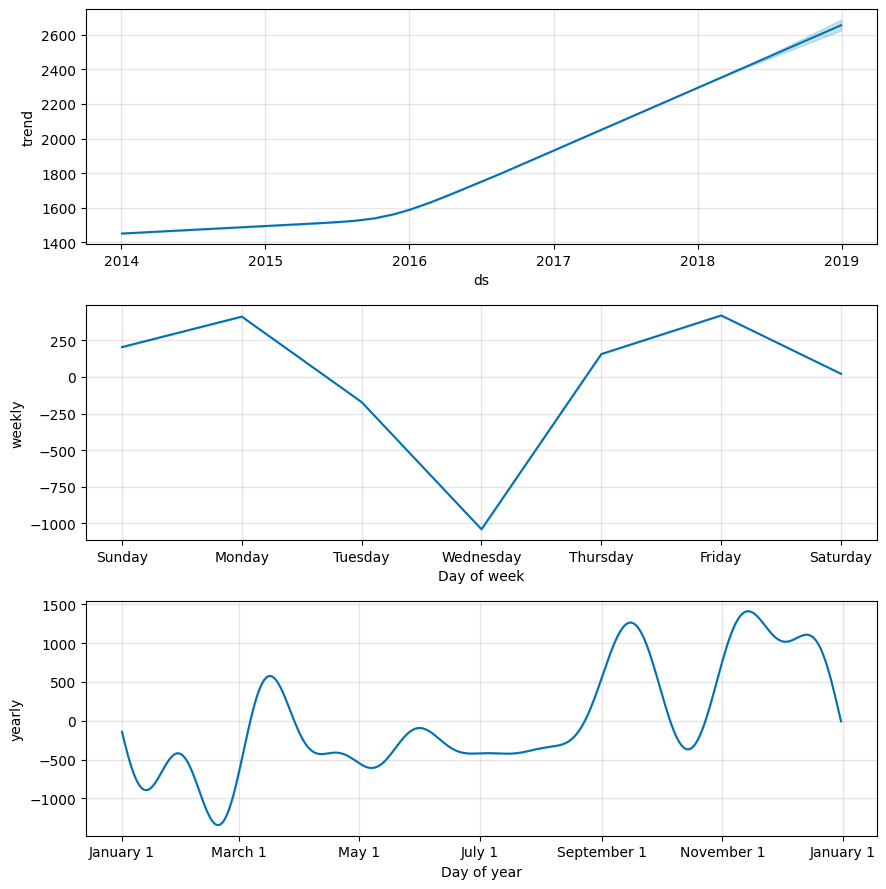

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load dataset with encoding handling
file_path = "/content/Superstore - store analysis.csv"
df = pd.read_csv(file_path, encoding='latin1')

# Convert Order Date to datetime format (handling mixed formats)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', errors='coerce')

# Drop any rows where conversion failed
df = df.dropna(subset=['Order Date'])

# Aggregate sales data for Prophet modeling
df_daily = df.groupby('Order Date').sum().reset_index()[['Order Date', 'Sales']]
df_daily = df_daily.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Initialize and train Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(df_daily)

# Create future dates for predictions
future = model.make_future_dataframe(periods=365)  # Extend for a year
forecast = model.predict(future)

# Plot seasonality components (Yearly, Weekly trends)
model.plot_components(forecast)
plt.show()

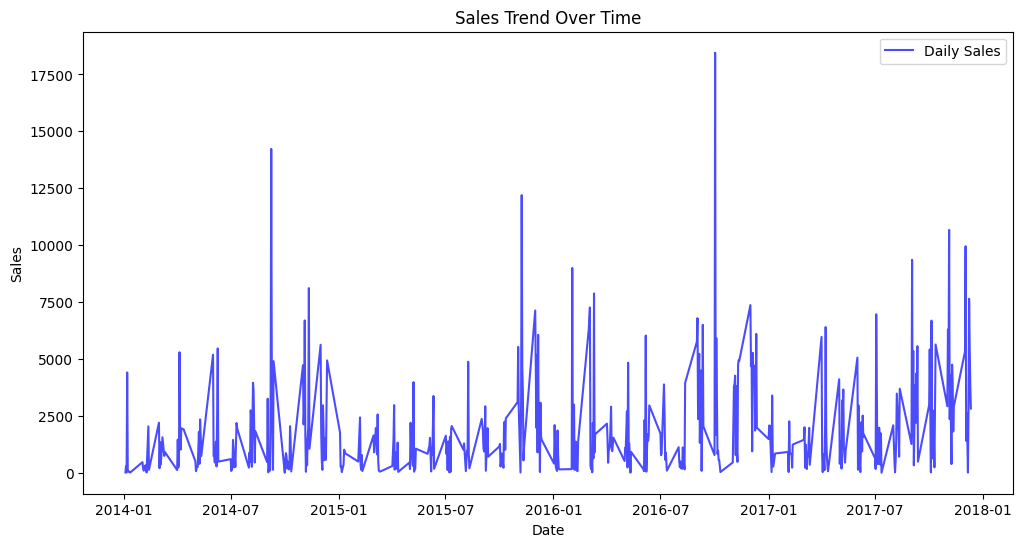

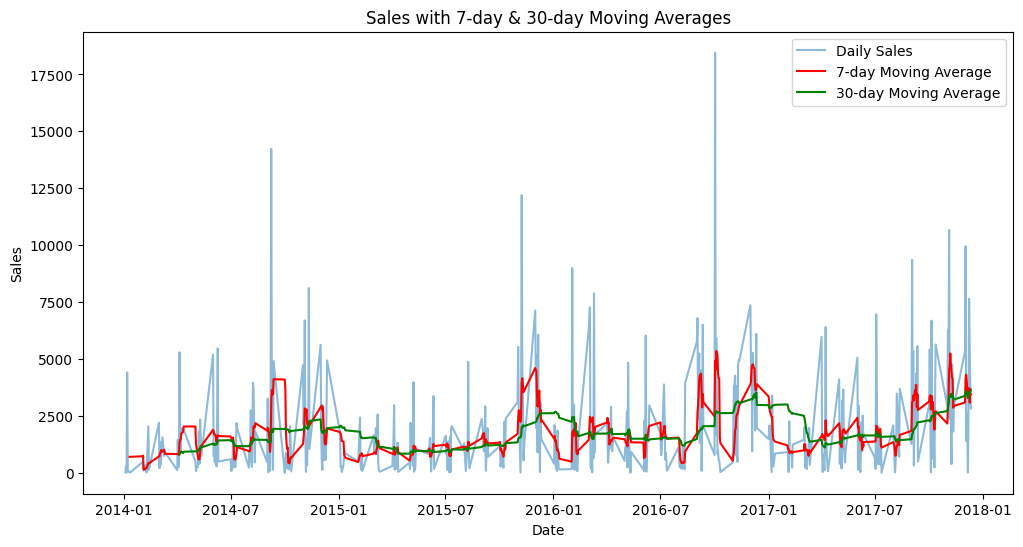

ValueError: x must have 2 complete cycles requires 730 observations. x only has 483 observation(s)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
file_path = "/content/Superstore - store analysis.csv"
df = pd.read_csv(file_path, encoding='latin1')

# Convert Order Date to datetime format (handling mixed formats)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])

# Aggregate sales data
df_daily = df.groupby('Order Date').sum().reset_index()[['Order Date', 'Sales']]
df_daily = df_daily.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# 1️⃣ **Sales Trend Over Time**
plt.figure(figsize=(12, 6))
plt.plot(df_daily['ds'], df_daily['y'], label="Daily Sales", color="blue", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")
plt.legend()
plt.show()

# 2️⃣ **Moving Averages (7-day and 30-day)**
df_daily['7-day MA'] = df_daily['y'].rolling(window=7).mean()
df_daily['30-day MA'] = df_daily['y'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_daily['ds'], df_daily['y'], label="Daily Sales", alpha=0.5)
plt.plot(df_daily['ds'], df_daily['7-day MA'], label="7-day Moving Average", color="red")
plt.plot(df_daily['ds'], df_daily['30-day MA'], label="30-day Moving Average", color="green")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales with 7-day & 30-day Moving Averages")
plt.legend()
plt.show()

# 3️⃣ **Seasonality Decomposition (Trend, Seasonality, Residuals)**
decomposition = seasonal_decompose(df_daily.set_index('ds')['y'], model='additive', period=365)
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
decomposition.trend.plot(ax=axes[0], title="Trend")
decomposition.seasonal.plot(ax=axes[1], title="Seasonality")
decomposition.resid.plot(ax=axes[2], title="Residuals")
plt.xlabel("Date")
plt.show()

# 4️⃣ **Year-over-Year Sales Comparison**
df_daily['Year'] = df_daily['ds'].dt.year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x='ds', y='y', hue='Year', palette='tab10')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Year-over-Year Sales Comparison")
plt.legend(title="Year")
plt.show()

# 5️⃣ **Monthly Sales Trends (Boxplot)**
df_daily['Month'] = df_daily['ds'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_daily, x='Month', y='y', palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trends (Boxplot)")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

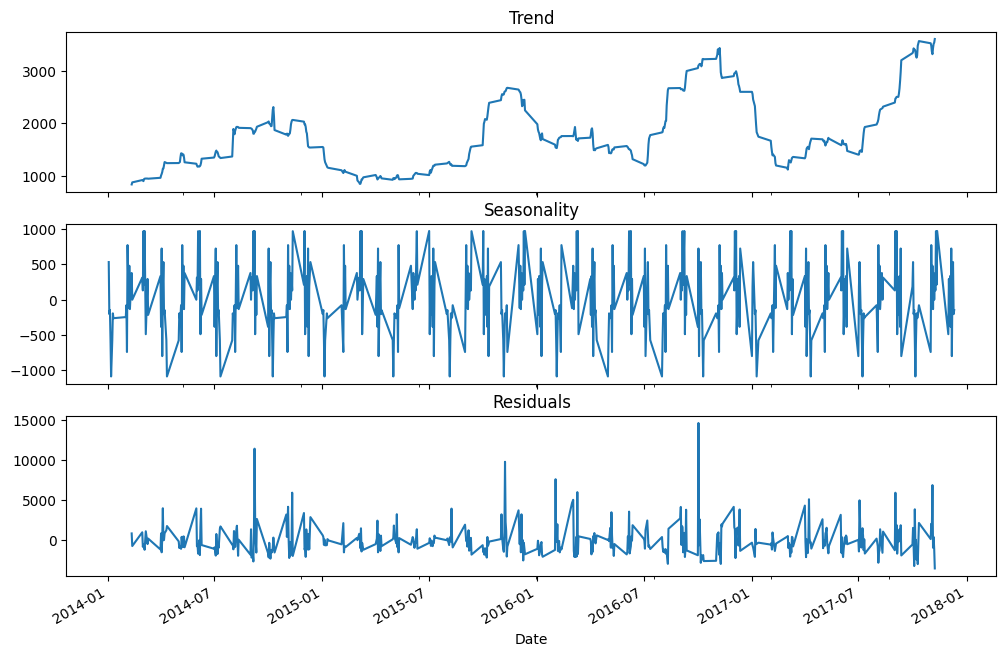

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Use a smaller period for decomposition (e.g., 30 days for monthly seasonality)
decomposition = seasonal_decompose(df_daily.set_index('ds')['y'], model='additive', period=30)

# Plot Trend, Seasonality, and Residuals
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
decomposition.trend.plot(ax=axes[0], title="Trend")
decomposition.seasonal.plot(ax=axes[1], title="Seasonality")
decomposition.resid.plot(ax=axes[2], title="Residuals")
plt.xlabel("Date")
plt.show()